# Introduction

by Arvin Assanny

### Description

We are using dataset from bigquery-public data which consist of credit card clients , which we retrived using SQL query

```
SELECT limit_balance, 
CAST(sex AS INT64) AS sex, CAST(education_level AS INT64) AS education_level, CAST(marital_status AS INT64) AS marital_status, age, pay_0, pay_2, pay_3, pay_4, CAST(pay_5 AS FLOAT64) AS pay_5, CAST(pay_6 AS FLOAT64) AS pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3,pay_amt_4, pay_amt_5, pay_amt_6, CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` 
LIMIT 5994;
```

After retrieve the filtered dataset, we save it on .csv file then proceed to load it, in this notebook later on.

### Problem
Buatlah model Classification untuk memprediksi `default_payment_next_month` menggunakan dataset yang sudah kalian simpan.

## Import Libraries

We will import libraries which we will use on completing this assignment

In [1]:
# Data Loading
import pandas as pd
from pandas.api.types import CategoricalDtype

#Importing Warning filtering
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Feature Selection (manual)
import numpy as np

# Model Definition
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

# Model Inference
import joblib

# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For showing our time
import time

## Data Loading

In [2]:
df = pd.read_csv('h8dsft_P1M1_Arvin_Assanny.csv')
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
2,200000,1,1,1,58,0,0,0,0,0,...,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
3,500000,1,1,1,39,0,0,0,0,0,...,174500,137406,204975,54209,4607,4603,5224,207440,7509,0
4,230000,1,1,1,48,0,0,0,0,0,...,105508,108101,110094,7000,6607,3773,4290,4164,2000,0
5,500000,1,2,1,41,0,0,0,0,0,...,152365,139757,153348,20000,20241,20154,20019,20151,20037,0
6,50000,1,2,1,40,0,0,0,0,0,...,44356,19344,19354,1691,1942,1296,674,693,1000,0
7,100000,1,5,1,45,0,0,0,0,0,...,90500,82586,22620,5000,5000,3203,2103,50000,0,0
8,140000,1,2,1,29,0,0,0,0,0,...,132038,131961,124256,6696,5000,4866,5300,5055,5000,0
9,50000,1,2,1,43,0,0,0,0,0,...,48934,29116,28999,1800,2200,1400,582,580,30000,0


In [3]:
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,300000,2,2,1,28,-1,-1,-1,-1,-2,...,0,0,0,1000,16666,0,0,0,0,0
2956,200000,2,1,1,49,-1,-1,-1,-1,-2,...,0,0,0,0,103,0,0,0,225,0
2957,50000,2,1,2,31,-1,0,-1,-1,-1,...,3995,0,0,30018,12787,3995,0,0,0,0
2958,50000,2,1,2,25,-1,-1,2,-1,-1,...,10610,0,0,5000,200,10610,0,0,0,0
2959,100000,2,1,2,37,-1,-1,0,-1,-1,...,780,0,0,21711,1000,780,0,0,0,0
2960,30000,2,3,2,50,-1,-1,2,-1,-1,...,1110,0,0,1860,0,1110,0,0,0,1
2961,20000,2,1,2,25,-1,-1,-1,-1,-1,...,640,0,0,0,855,640,0,0,2742,0
2962,280000,2,1,2,52,-1,-1,-1,-1,-2,...,0,0,0,0,930,0,0,0,0,0
2963,360000,2,2,2,26,-1,-1,-1,-1,-2,...,0,0,0,463,2500,0,0,0,0,0
2964,100000,2,1,2,30,-1,-1,-1,-1,-2,...,0,0,0,35993,2772,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

We have all numerical data type within our dataset, later on we will change some of the columns to make it easier to group it.

In [5]:
df.shape

(2965, 24)

In this dataset we have 2965 rows of data and 24 columns. Let's see if those columns have missing value :

In [6]:
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

We have no missing value here.

Now we want to check duplicated data in our dataset.

In [7]:
df.duplicated().sum()

1

Here we have one duplicate data, we will remove it.

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

After drop the rows, we have no duplicated data

In [10]:
df.reset_index()

,index,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,0,130000,1,1,1,45,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,1,230000,1,2,1,41,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
2,2,200000,1,1,1,58,0,0,0,0,...,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
3,3,500000,1,1,1,39,0,0,0,0,...,174500,137406,204975,54209,4607,4603,5224,207440,7509,0
4,4,230000,1,1,1,48,0,0,0,0,...,105508,108101,110094,7000,6607,3773,4290,4164,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,2960,30000,2,3,2,50,-1,-1,2,-1,...,1110,0,0,1860,0,1110,0,0,0,1
2960,2961,20000,2,1,2,25,-1,-1,-1,-1,...,640,0,0,0,855,640,0,0,2742,0
2961,2962,280000,2,1,2,52,-1,-1,-1,-1,...,0,0,0,0,930,0,0,0,0,0
2962,2963,360000,2,2,2,26,-1,-1,-1,-1,...,0,0,0,463,2500,0,0,0,0,0


Here we reset index of our data to minimize error.

Now, we want to rename some of our columns to help us understand better.

In [11]:
df.rename(columns={'default_payment_next_month':'default', 'pay_0':'pay_1'}, inplace=True)
df.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default'],
      dtype='object')

## Data Cleaning

We want to prepare our data and clean some noise which can influence the model that we build.

### Checking Errors

Now we want to explore more about our data,  and check whether our data have some errors on it.

In [12]:
df['age'].sort_values(ascending=False)

472     69
847     69
1813    68
536     67
2342    67
        ..
1120    21
694     21
607     21
2472    21
2904    21
Name: age, Length: 2964, dtype: int64

Here, we know that the minimum age of this column is 21, and the maximum is 69. We also don't see any errors in this column.

In [13]:
df['sex'].value_counts()

2    1801
1    1163
Name: sex, dtype: int64

We are showed there are 1801 female and 1163 male.

In [14]:
df['education_level'].value_counts()

2    1400
1    1038
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

We check education_level columns, and find some insight that:

It should be like this

education_level:

1 = graduate school

2 = university

3 = high school

4 = others

Here we find some uncategorized labels, so for these data, we will include them into labels (4) which is others to help us clean our data.

In [15]:
edu = (df['education_level'] == 5) | (df['education_level'] == 6) | (df['education_level'] == 0)
df.loc[edu, 'education_level'] = 4
df['education_level'].value_counts()

2    1400
1    1038
3     483
4      43
Name: education_level, dtype: int64

Now we want to check on marital_status, which we found some errors too.


the labels should be like this:

marital_status:

1 = married

2 = single

3 = others

In [16]:
df['marital_status'].value_counts()

2    1594
1    1331
3      35
0       4
Name: marital_status, dtype: int64

In [17]:
mar = df['marital_status'] == 0
df.loc[mar, 'marital_status'] = 3
df['marital_status'].value_counts()

2    1594
1    1331
3      39
Name: marital_status, dtype: int64

There is value 0 which is not determined. So, might as well I am going to add the value to value 3 which is Others.

Now we want to look at pay_1 - pay_6 columns.

In [18]:
df_pay = df[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]
for i in df_pay.columns.tolist():
    print(i, '\n')
    print(df_pay[i].value_counts())
    print('-'*30)

pay_1 

 0    1516
-1     540
 1     355
 2     262
-2     247
 3      29
 4       7
 8       3
 5       2
 7       2
 6       1
Name: pay_1, dtype: int64
------------------------------
pay_2 

 0    1607
-1     580
 2     374
-2     352
 3      32
 4       8
 1       4
 7       3
 5       2
 6       2
Name: pay_2, dtype: int64
------------------------------
pay_3 

 0    1610
-1     580
 2     368
-2     366
 3      22
 4       8
 6       4
 7       3
 5       3
Name: pay_3, dtype: int64
------------------------------
pay_4 

 0    1667
-1     532
-2     407
 2     324
 3      14
 4       7
 7       6
 5       5
 6       1
 8       1
Name: pay_4, dtype: int64
------------------------------
pay_5 

 0    1702
-1     504
-2     440
 2     280
 3      19
 4       9
 7       7
 5       2
 6       1
Name: pay_5, dtype: int64
------------------------------
pay_6 

 0    1626
-1     540
-2     469
 2     297
 3      21
 7       6
 6       3
 4       2
Name: pay_6, dtype: int64
--------------

We saw some non defined values from each pay_ columns, which is -2. This value isn't categorized if we looked our dataset description. So here we want to manipulate the values of -2 and -1 into the pay duly category (0):

In [19]:
df['pay_1'] = df['pay_1'].replace([-2,-1], 0)
df['pay_2'] = df['pay_2'].replace([-2,-1], 0)
df['pay_3'] = df['pay_3'].replace([-2,-1], 0)
df['pay_4'] = df['pay_4'].replace([-2,-1], 0)
df['pay_5'] = df['pay_5'].replace([-2,-1], 0)
df['pay_6'] = df['pay_6'].replace([-2,-1], 0)

In [20]:
df_pay = pd.DataFrame(df[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']])
for i in df_pay:
    print(df_pay[i].value_counts())
    print('=='*20)

0    2303
1     355
2     262
3      29
4       7
8       3
5       2
7       2
6       1
Name: pay_1, dtype: int64
0    2539
2     374
3      32
4       8
1       4
7       3
5       2
6       2
Name: pay_2, dtype: int64
0    2556
2     368
3      22
4       8
6       4
7       3
5       3
Name: pay_3, dtype: int64
0    2606
2     324
3      14
4       7
7       6
5       5
6       1
8       1
Name: pay_4, dtype: int64
0    2646
2     280
3      19
4       9
7       7
5       2
6       1
Name: pay_5, dtype: int64
0    2635
2     297
3      21
7       6
6       3
4       2
Name: pay_6, dtype: int64


Here we changed some values which was not recognized. Now we go ahead to explore another thing.

#### Reduce Cardinality

After change the unique value in repayment status, it feels more convenient to observe and analyze repayment status columns. So that now the values are changed, it means the value descriptions are also changed.

0 = pay duly

1 = repayment delay for one month

2 = repayment delay for two months

3 = repayment delay for more than two months

We also do this to reduce cardinality within our column, which we assume may help us to simplify the dataset and make it easier to work with, also to improve the performance of our machine learning models.

In [21]:
for i in df_pay:
    edu = (df_pay[i] == 4) | (df_pay[i] == 5) | (df_pay[i] == 6) | (df_pay[i] == 7) | (df_pay[i] == 8)
    df_pay.loc[edu, i] = 3

    print(df_pay[i].value_counts())
    print('-'*30)

0    2303
1     355
2     262
3      44
Name: pay_1, dtype: int64
------------------------------
0    2539
2     374
3      47
1       4
Name: pay_2, dtype: int64
------------------------------
0    2556
2     368
3      40
Name: pay_3, dtype: int64
------------------------------
0    2606
2     324
3      34
Name: pay_4, dtype: int64
------------------------------
0    2646
2     280
3      38
Name: pay_5, dtype: int64
------------------------------
0    2635
2     297
3      32
Name: pay_6, dtype: int64
------------------------------


Now we want to concat the reduced values in pay_1 - pay_6

In [22]:
df.drop(['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'], axis=1, inplace=True)

df = pd.concat([df.reset_index(drop=True),df_pay.reset_index(drop=True)], axis=1)
df.head()

,limit_balance,sex,education_level,marital_status,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,...,pay_amt_4,pay_amt_5,pay_amt_6,default,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,130000,1,1,1,45,58180,59134,61156,62377,63832,...,2354,2366,2291,0,0,0,0,0,0,0
1,230000,1,2,1,41,301038,305327,213058,216260,215968,...,8030,6549,5226,1,0,0,0,0,0,0
2,200000,1,1,1,58,192461,195970,122214,124647,126921,...,4597,4677,4698,0,0,0,0,0,0,0
3,500000,1,1,1,39,133598,167378,171106,174500,137406,...,5224,207440,7509,0,0,0,0,0,0,0
4,230000,1,1,1,48,160879,161797,165107,105508,108101,...,4290,4164,2000,0,0,0,0,0,0,0


Here we successfully manipulate our data.

## Exploratory Data Analysis

Now we want to explore about our data which may provide insights about the data.

Default Payment (1 = Yes, 0 = No)

### Checking Target Distribution

In this case, we use default column as our target

In [23]:
print(f'Number of unique values in default column: {df.default.nunique()}')
print(f'Unique values in default column: {df.default.unique()}')

Number of unique values in default column: 2
Unique values in default column: [0 1]


As we already know, we only have 2 unique values in our target.

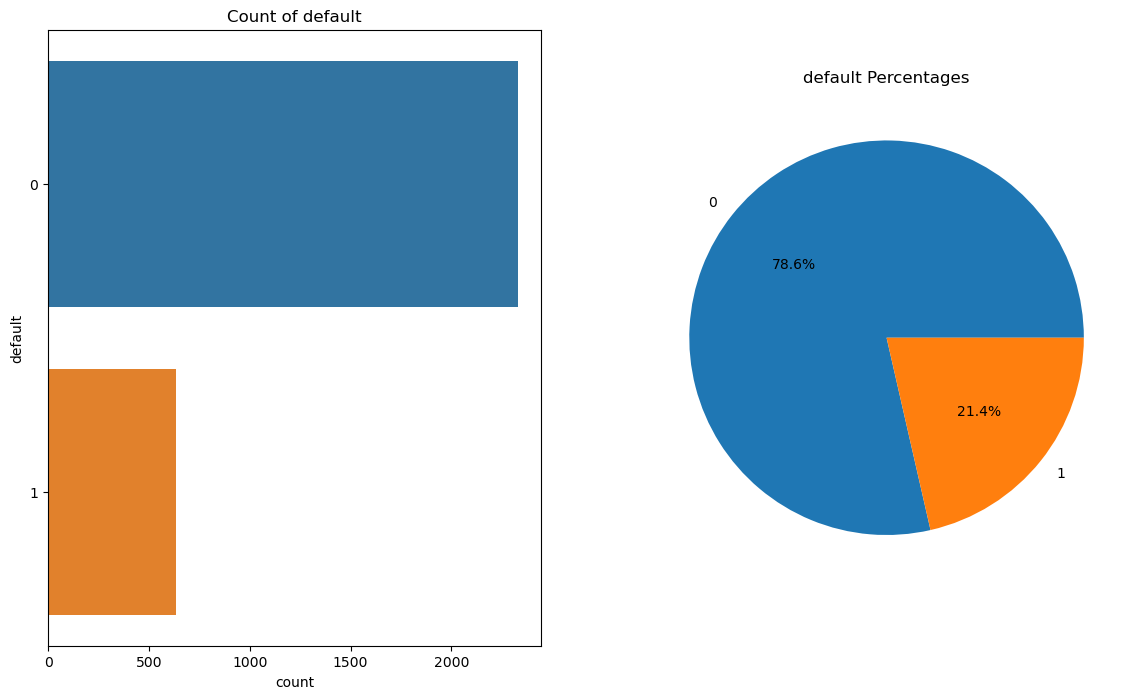

In [24]:
# Plot our target column
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.countplot(y='default', data=df)
plt.title('Count of default')

plt.subplot(1, 2, 2)
plt.pie(df.groupby('default').size(), labels=df.groupby('default').size().index, autopct='%1.1f%%')
plt.title('default Percentages')
plt.show()

Based on the plot that is showing the graphic of comparison between total data of both classes, we can tell that we have imbalanced dataset.

### Changing data type

Here we decided to change some of our columns data type.

In [25]:
# change nominal data dtypes to object
df[['sex', 'education_level', 'marital_status']] = \
    df[['sex', 'education_level', 'marital_status']].astype('object')

# change ordinal data dtypes to category
type_pay1_pay6 = pd.api.types.CategoricalDtype(categories=[-2, -1, 0, 
                                                            1,  2, 3, 4, 5, 6, 7, 8, 9])
df[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']] = \
    df[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].astype(type_pay1_pay6)


# get the columns
num_cols = df.drop('default', axis='columns') \
                            .select_dtypes(include='number').columns.tolist()
ord_cols = df.select_dtypes(include='category').columns.tolist()
nom_cols = df.select_dtypes(include='object').columns.tolist()

We also assign our data type into some variables.

In [26]:
print(f'Number of numerical columns: {len(num_cols)}')
print(f'Numerical columns: {num_cols}')
print(f'Number of nominal columns: {len(nom_cols)}')
print(f'Nominal columns: {nom_cols}')
print(f'Number of Ordinal columns: {len(ord_cols)}')
print(f'Ordinal columns: {ord_cols}')

Number of numerical columns: 14
Numerical columns: ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Number of nominal columns: 3
Nominal columns: ['sex', 'education_level', 'marital_status']
Number of Ordinal columns: 6
Ordinal columns: ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


### Univariate Columns

We want to explore our data in a single column and visualize some insights.

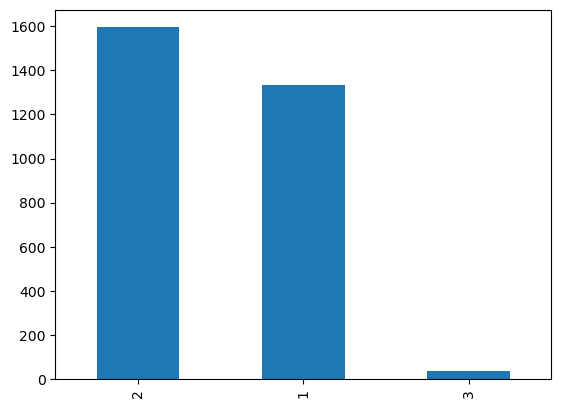

In [27]:
df['marital_status'].value_counts().plot(kind = 'bar')
plt.show()

Most marital_status in our data is single.

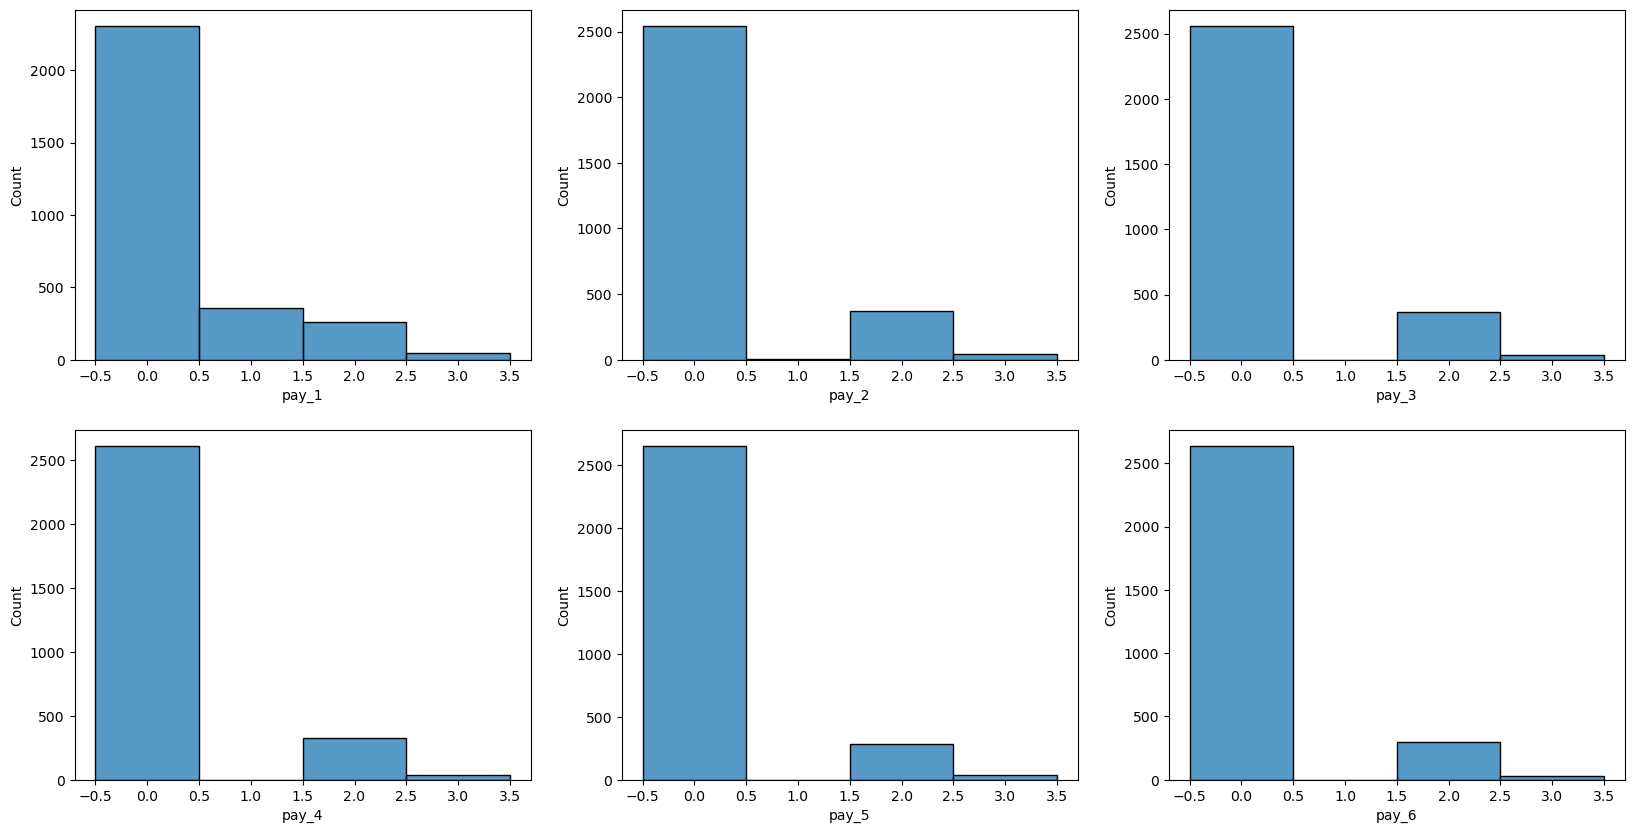

In [28]:
# Exploring the repayment status from april to september
pay = ['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']
fig, ax = plt.subplots(ncols=3,nrows=2,figsize=(20,10))
x=0
for i in range(2):
  for j in range(3):
    try:
      sns.histplot(df[pay[x]],ax=ax[i][j])
      x+=1
    except:
      pass
plt.show()

Here, we can show distribution in our `pay_` column after previously we reduce its labels.

### Bivariate Columns

Here we want to visualize some relationship between two columns.

In [29]:
# Change some data labels, and assgin to new dataframe
df_nom = df.copy()
df_nom.replace({'sex': {1 : 'male', 2 : 'female'}, 'education_level' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'marital_status' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

We decide to rename some labels here to help us understand our charts a little bit better.

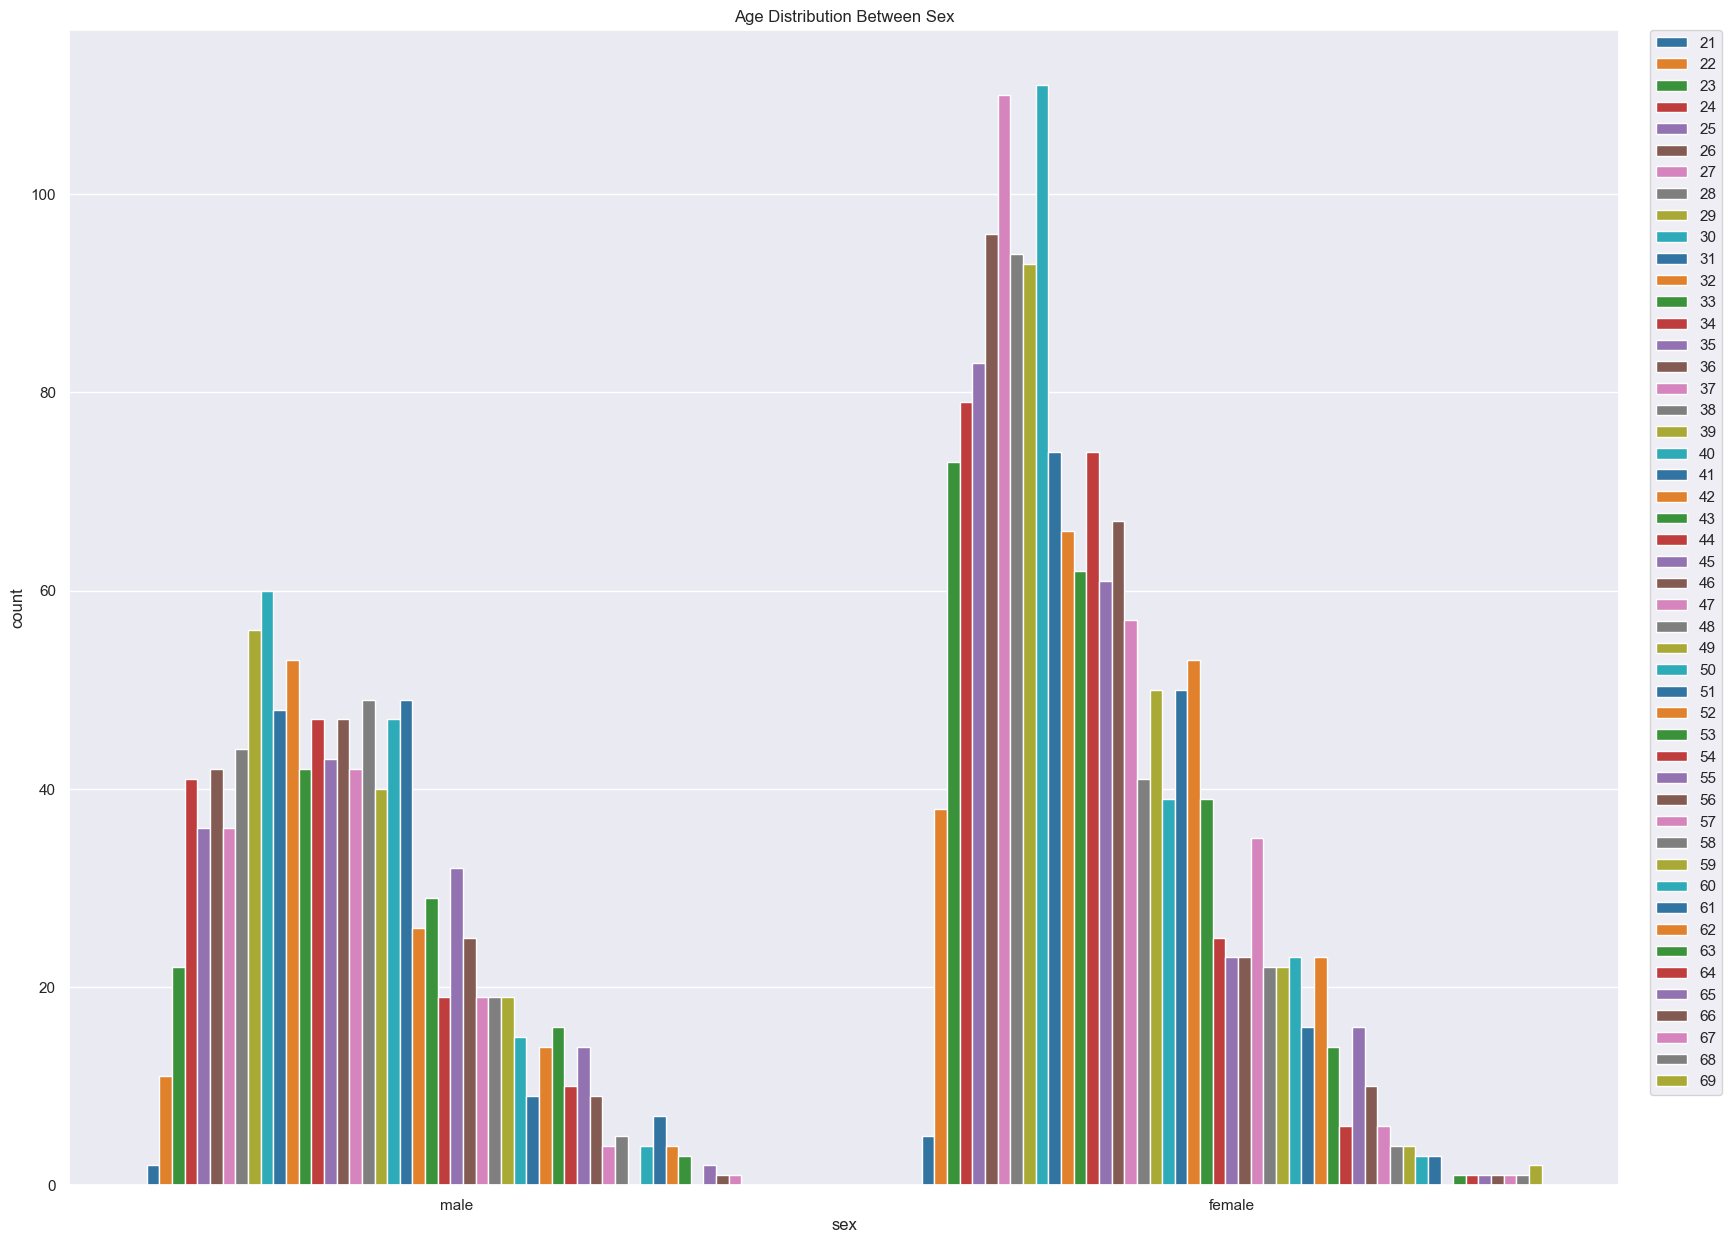

In [30]:
# Plot
sns.set(rc={'figure.figsize':(20,15)})
sns.countplot(data = df_nom, x = 'sex', hue = 'age', palette='tab10')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Age Distribution Between Sex')
plt.show()

We see the age distribution between Male (1) and Female (2) shown in our plot. We saw that majority of user genders are female in the ages of 21 - 69. With active majority peaking at the age of 42. We saw a substantial difference in genders and ages, with the male peaking earlier in age which is 30.

Now we want to see chart from categorical columns towards default_payment value. To make it easier to understand, we decided to rename the labels on these columns

<Figure size 1000x500 with 0 Axes>

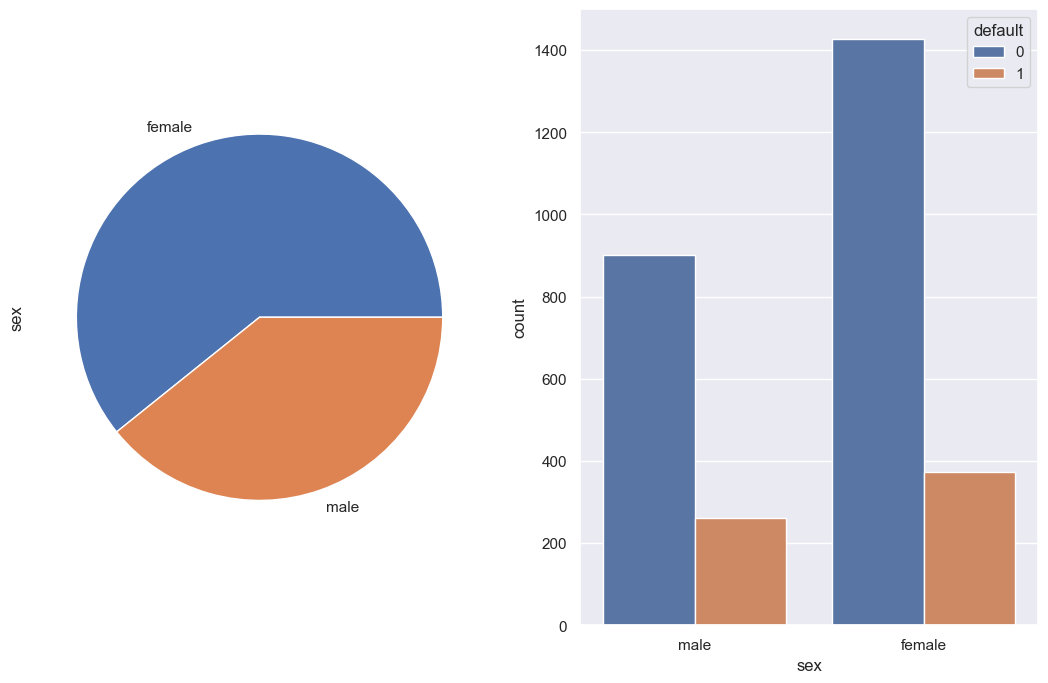

<Figure size 1000x500 with 0 Axes>

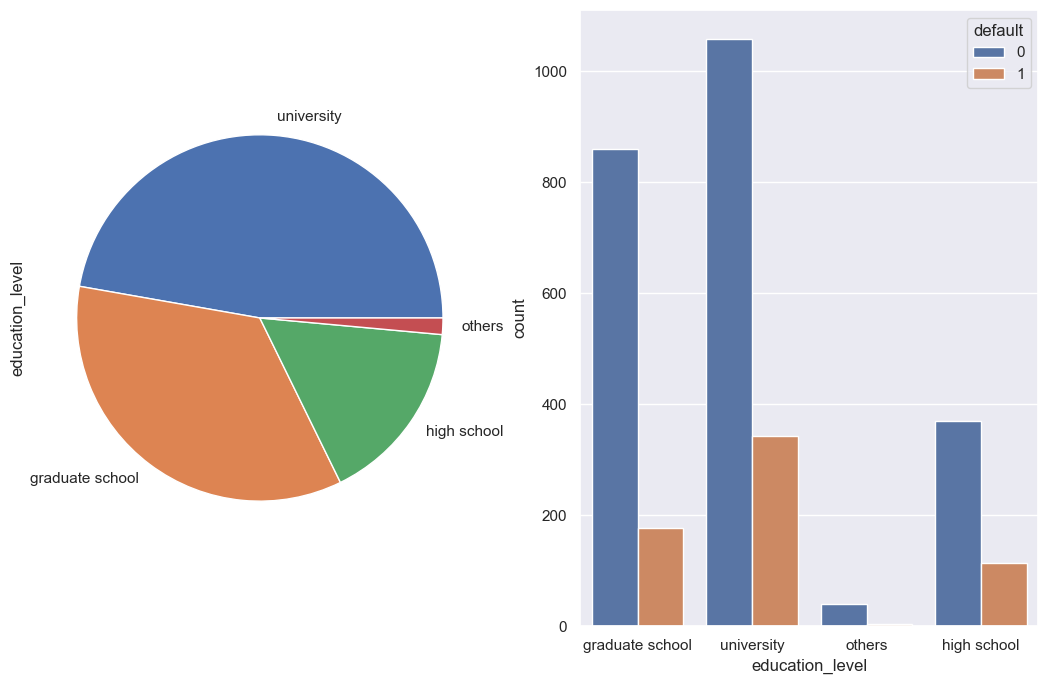

<Figure size 1000x500 with 0 Axes>

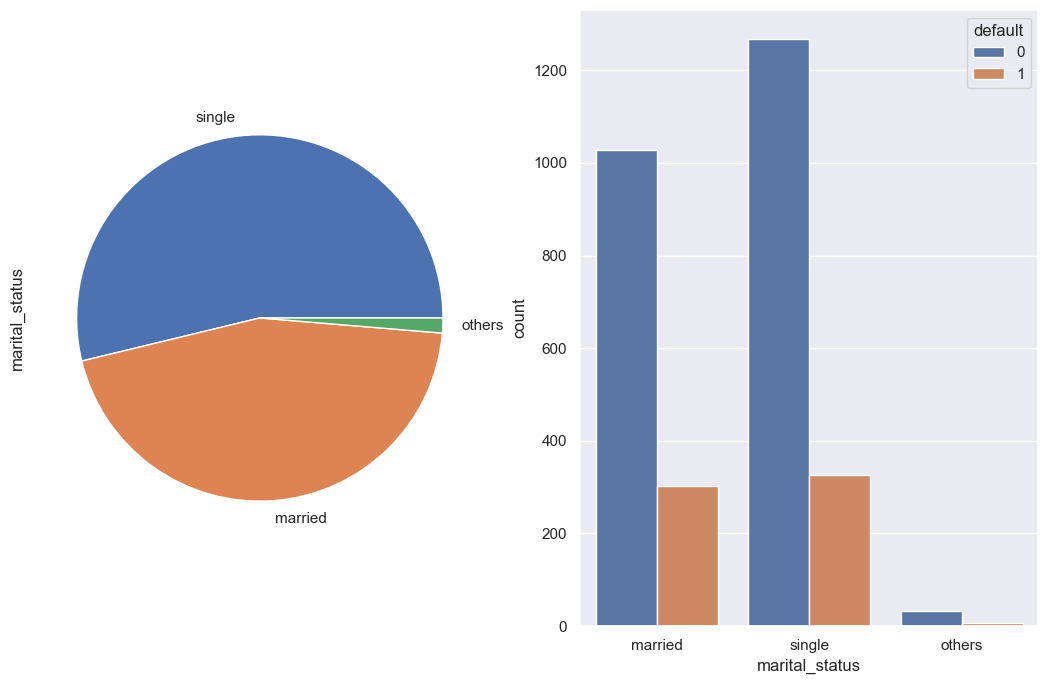

In [31]:
for col in nom_cols:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df_nom[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'default', data = df_nom)

After done displaying these chart from we can see that:

* Credit card owner is dominated by female. So it's understandable if the proportional value of female is higher than male.

* The highest total number based on the education level is university people, so that they have the highest proportional value compared to others which has more than a thousand people per-class. So it means, technically, all value has the same proportion towards class 0 and class 1 in default_payment.

* People with marital_status single has the most number. But the difference of total between single people and the married one is not significant, it means that both category is equal towards default_payment.

Next, we want to see relationship between age and default column

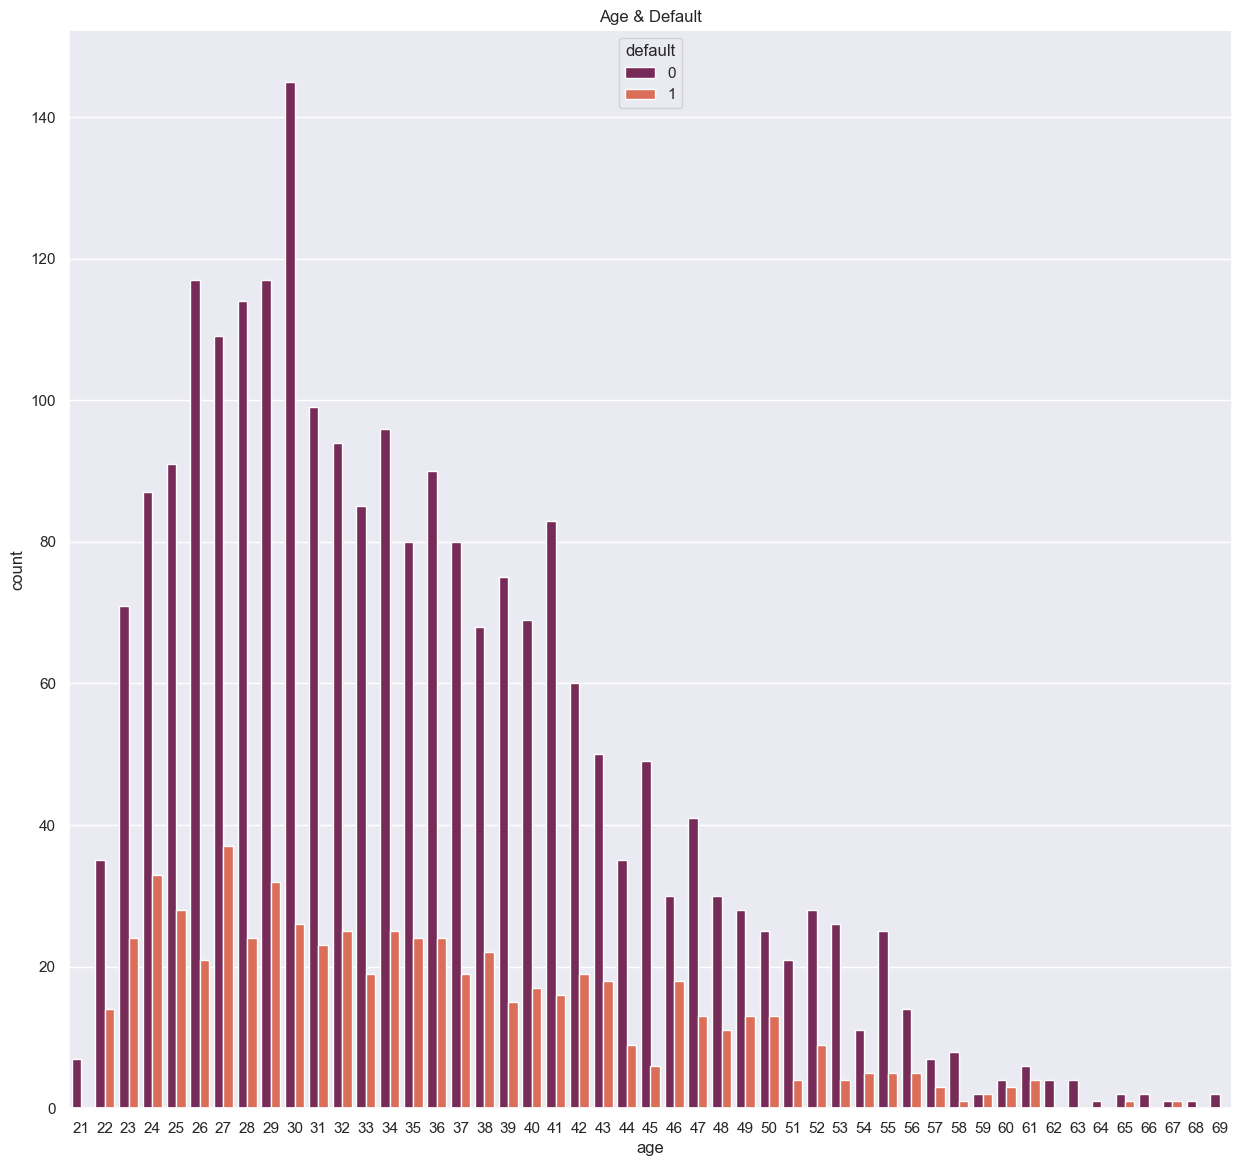

In [32]:
sns.set(rc={'figure.figsize':(15,14)})
sns.countplot(data=df, x = 'age', hue = 'default', palette = 'rocket')
plt.title('Age & Default')
plt.show()

As the age progresses the less likely that the credit card will be defaulted. Age may have an important role at determining future prediction and is the standard of people who wants to apply for a credit card.

### Check Numerical Columns Distribution

Here we want to see our numerical data distribution.

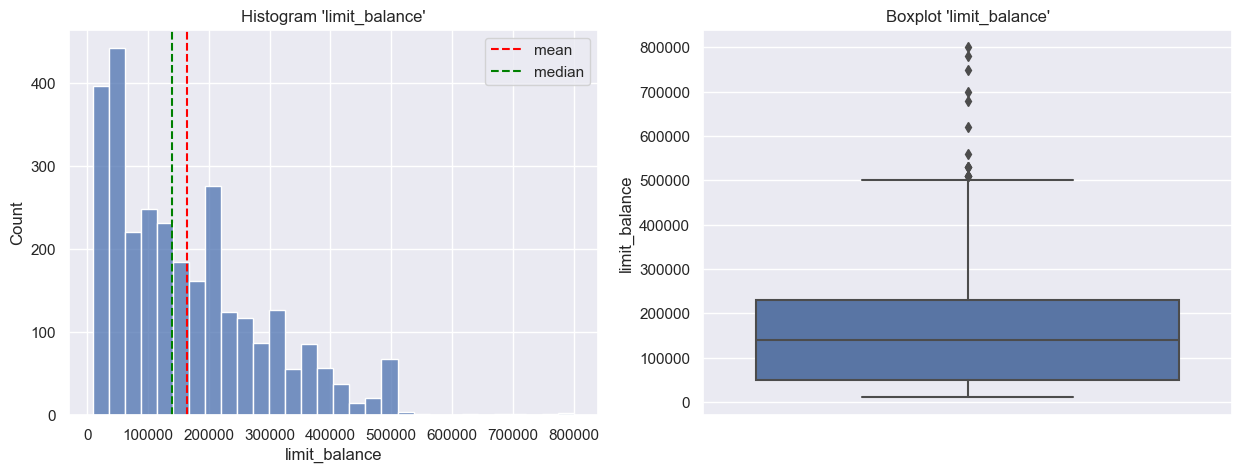

limit_balance Kurtosis: 0.6996887055637564
limit_balance Skewness: 1.0006047564306488
Columns 'limit_balance' Right Highly Skewed


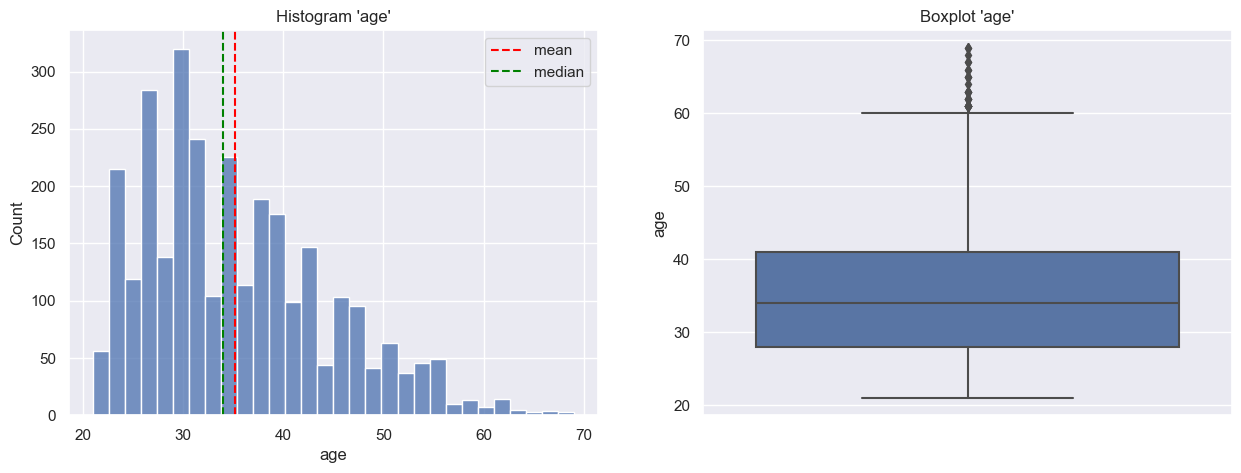

age Kurtosis: 0.08182141850804836
age Skewness: 0.7726317877077614
Columns 'age' Right Moderately Skewed


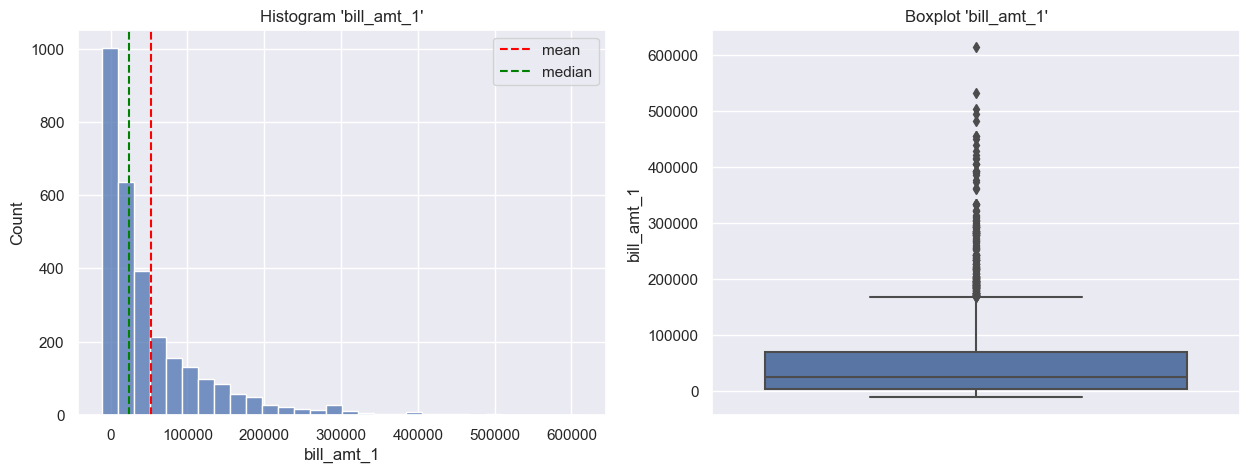

bill_amt_1 Kurtosis: 8.11481332014768
bill_amt_1 Skewness: 2.4842290445797968
Columns 'bill_amt_1' Right Highly Skewed


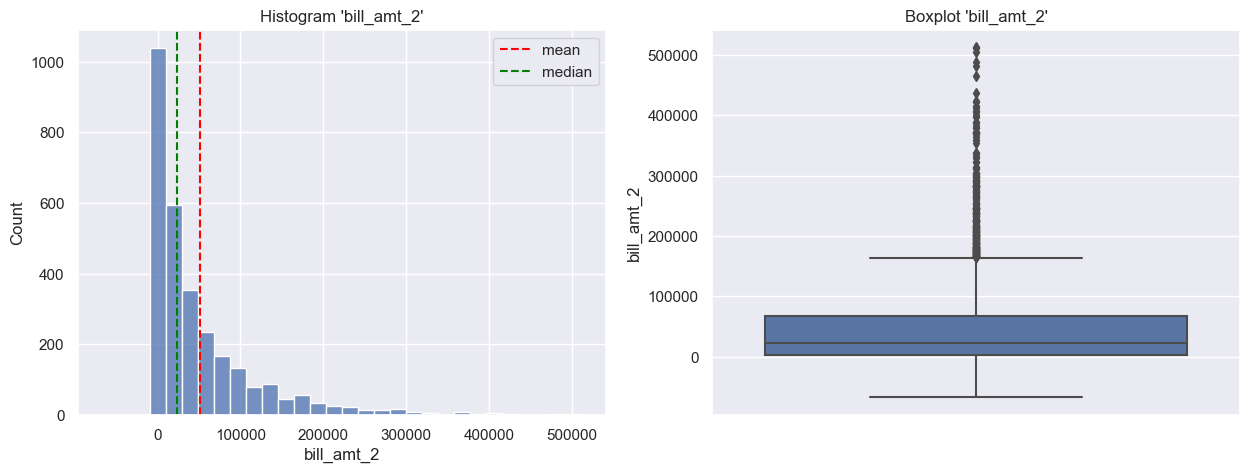

bill_amt_2 Kurtosis: 7.688166574363903
bill_amt_2 Skewness: 2.4579711014121437
Columns 'bill_amt_2' Right Highly Skewed


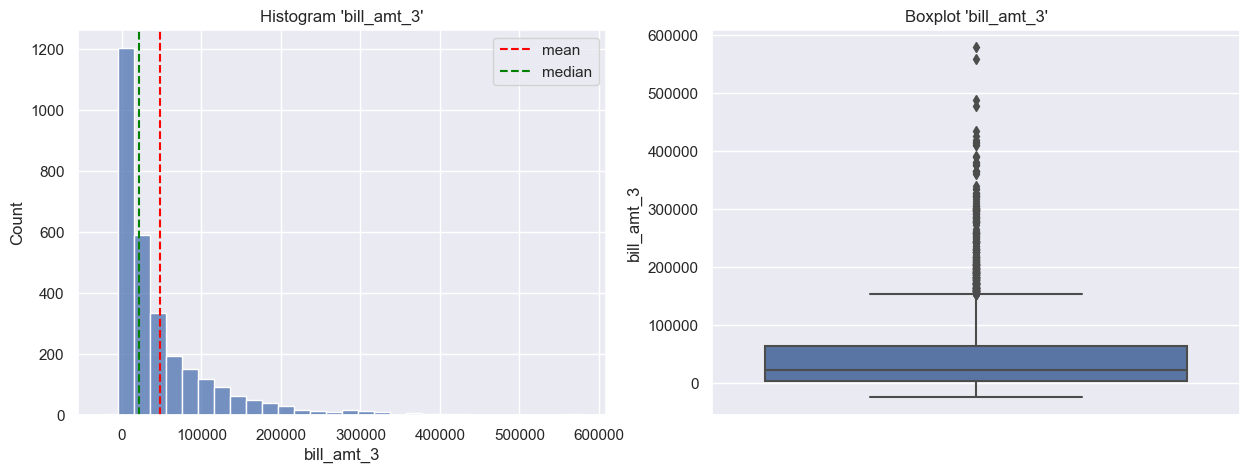

bill_amt_3 Kurtosis: 8.74999272211309
bill_amt_3 Skewness: 2.569558864308388
Columns 'bill_amt_3' Right Highly Skewed


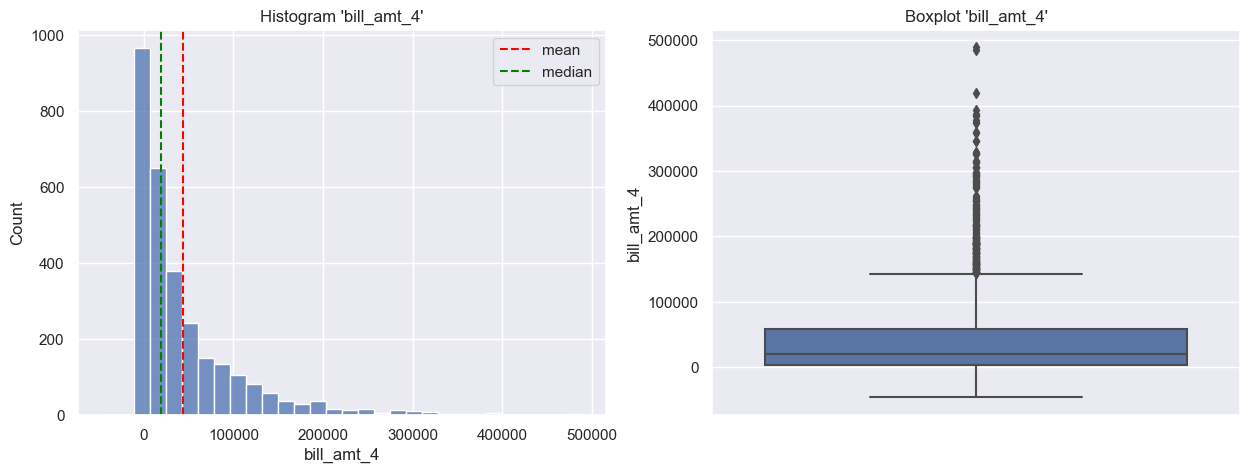

bill_amt_4 Kurtosis: 7.668929544007446
bill_amt_4 Skewness: 2.4477916276373533
Columns 'bill_amt_4' Right Highly Skewed


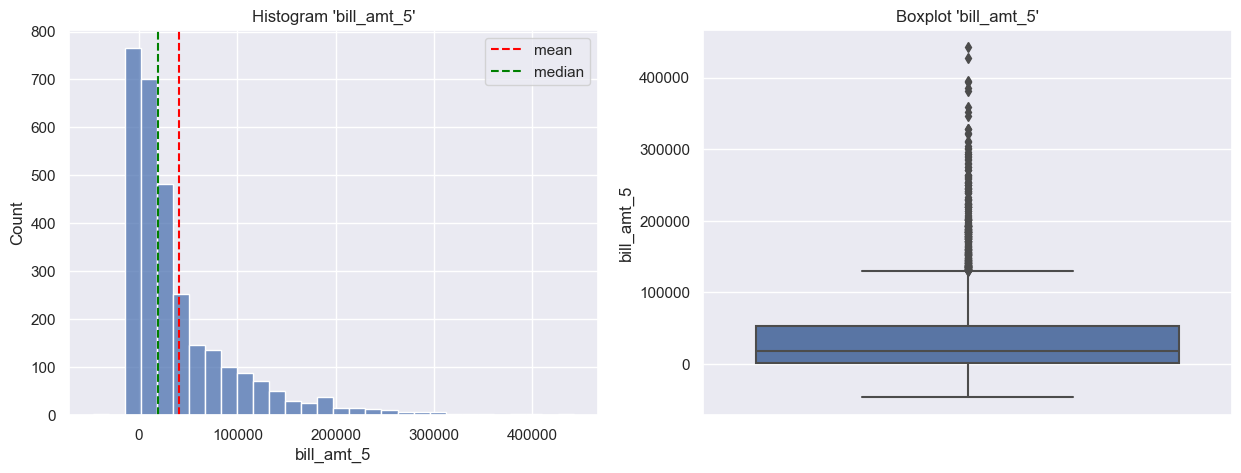

bill_amt_5 Kurtosis: 7.212404930970756
bill_amt_5 Skewness: 2.399943857538143
Columns 'bill_amt_5' Right Highly Skewed


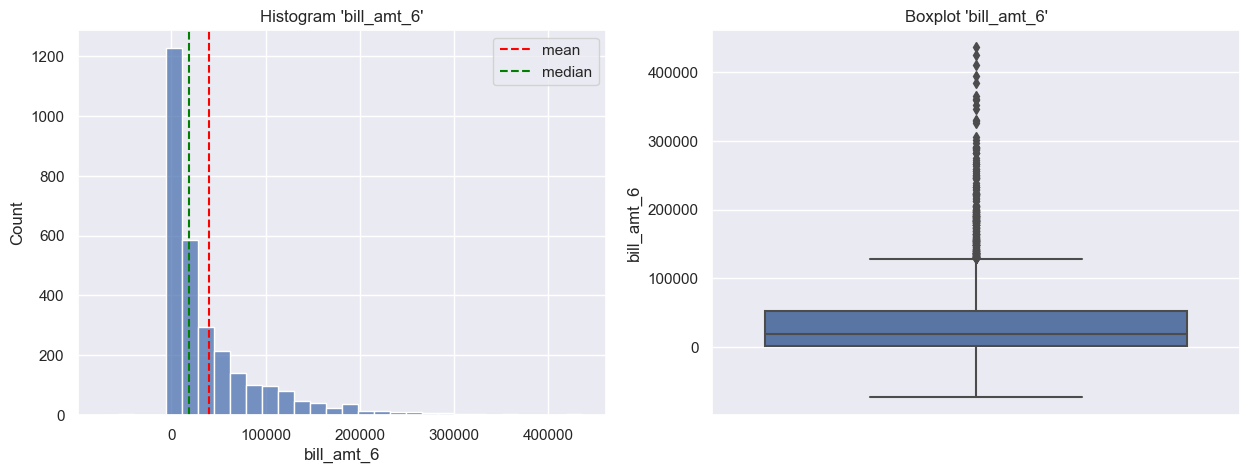

bill_amt_6 Kurtosis: 7.575746107546124
bill_amt_6 Skewness: 2.4319995109017865
Columns 'bill_amt_6' Right Highly Skewed


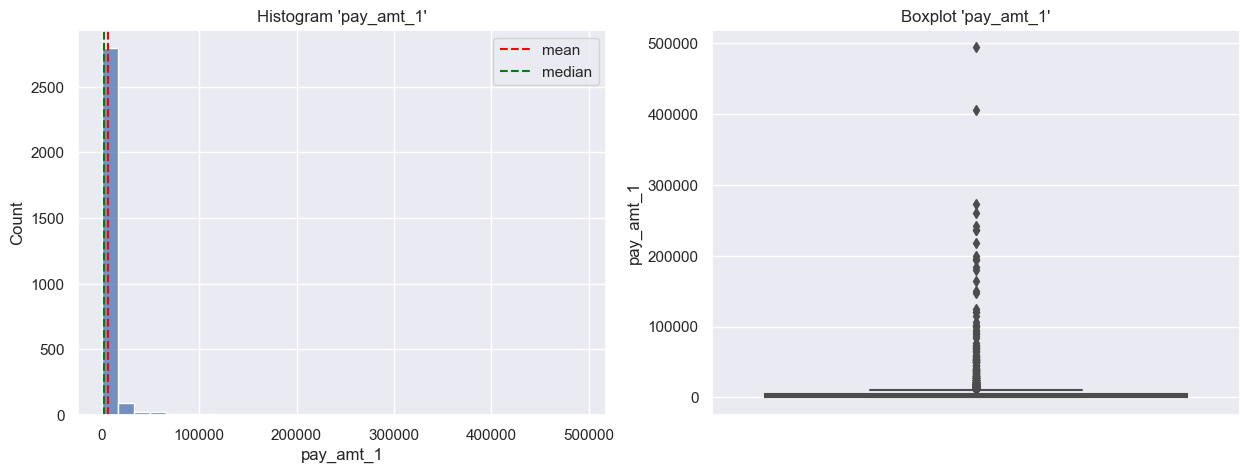

pay_amt_1 Kurtosis: 192.71930129189101
pay_amt_1 Skewness: 11.875902599772319
Columns 'pay_amt_1' Right Highly Skewed


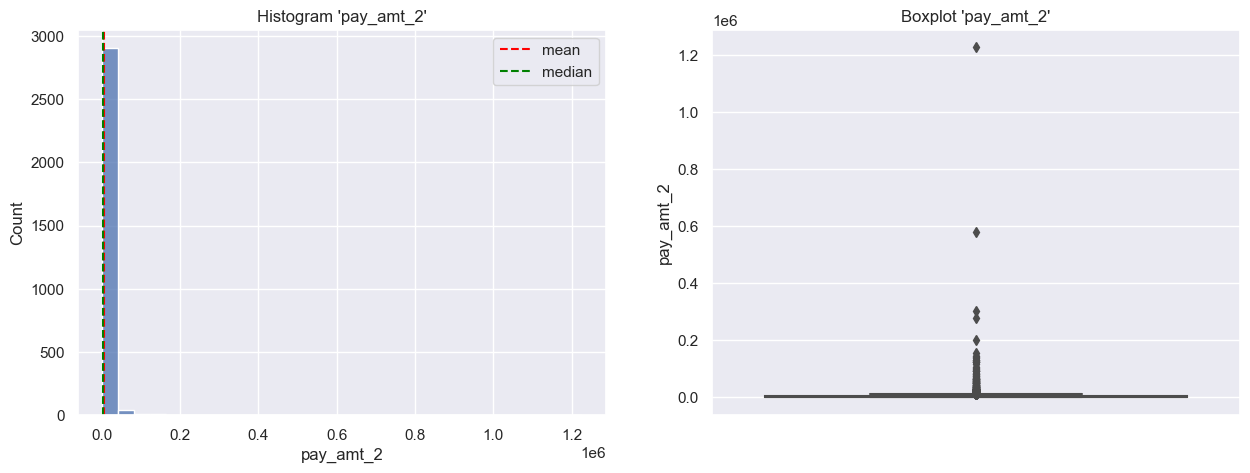

pay_amt_2 Kurtosis: 1137.9515500745397
pay_amt_2 Skewness: 29.39979237780382
Columns 'pay_amt_2' Right Highly Skewed


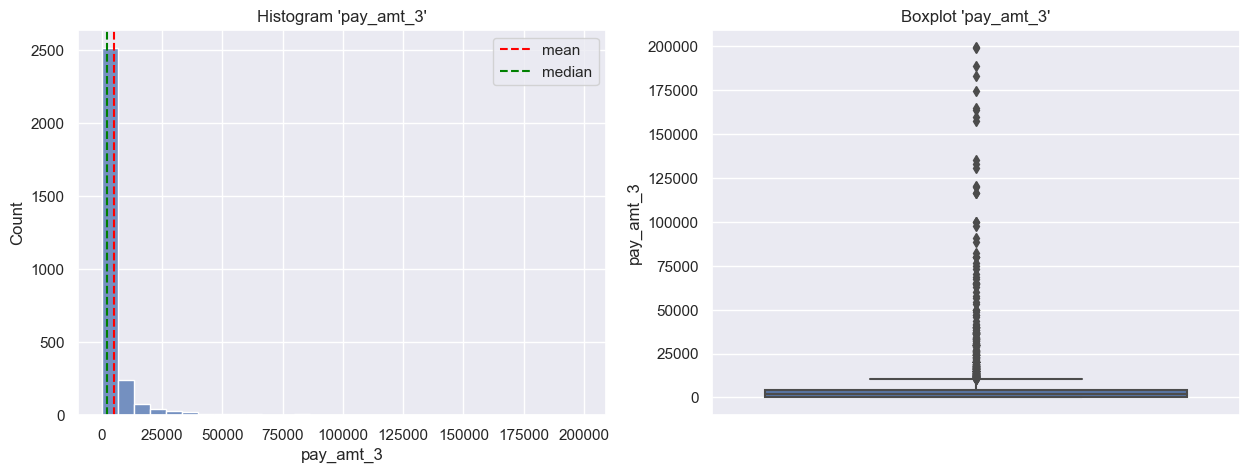

pay_amt_3 Kurtosis: 81.11087477589082
pay_amt_3 Skewness: 8.043463398022958
Columns 'pay_amt_3' Right Highly Skewed


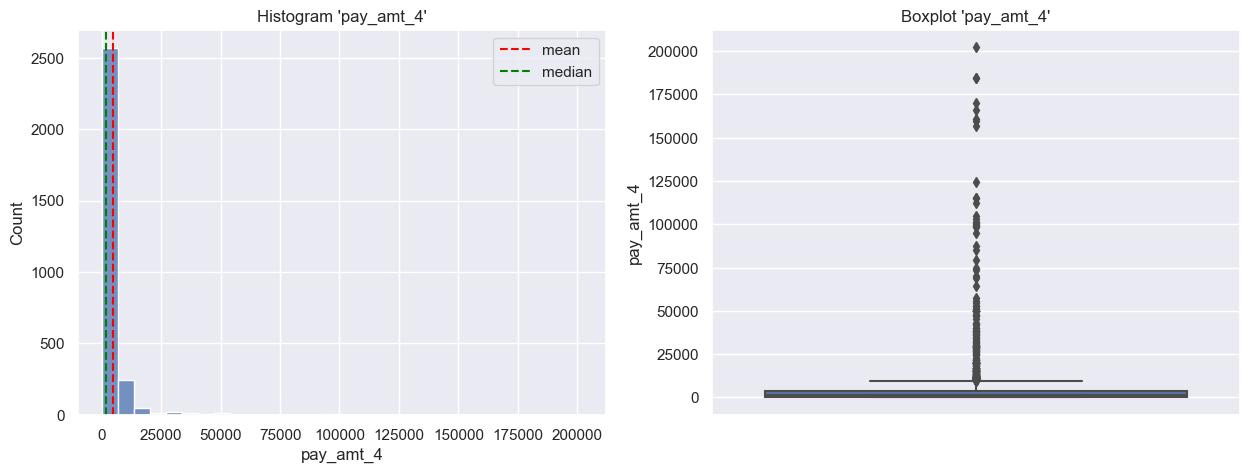

pay_amt_4 Kurtosis: 89.28295686769208
pay_amt_4 Skewness: 8.450287705274073
Columns 'pay_amt_4' Right Highly Skewed


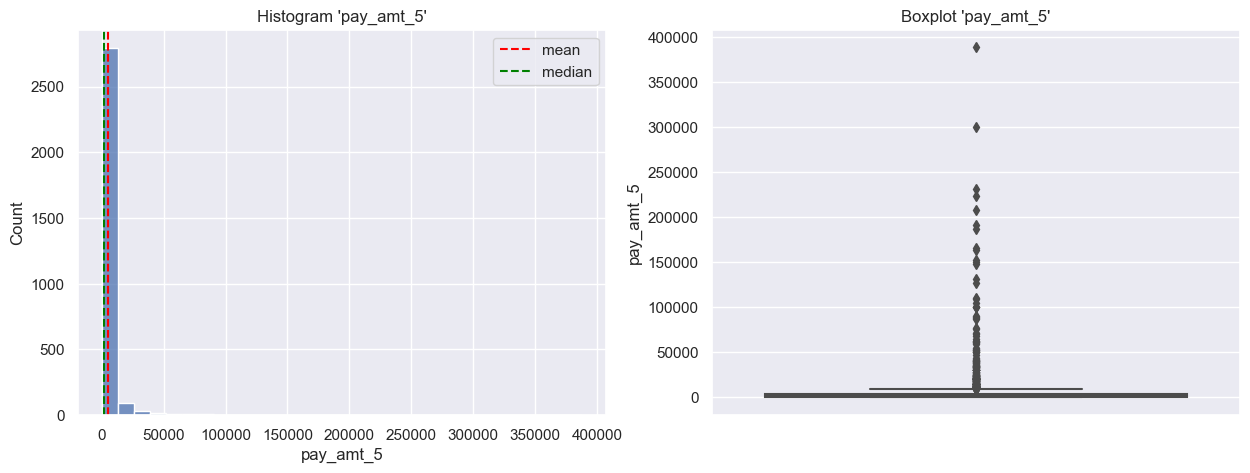

pay_amt_5 Kurtosis: 178.82169333574745
pay_amt_5 Skewness: 11.467169258420292
Columns 'pay_amt_5' Right Highly Skewed


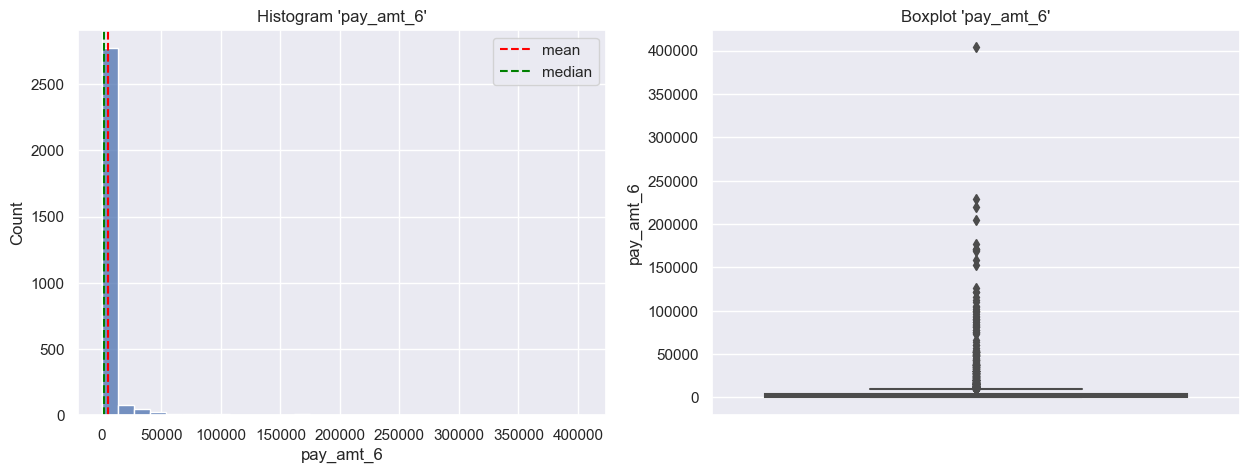

pay_amt_6 Kurtosis: 143.2677823353878
pay_amt_6 Skewness: 9.758714356332971
Columns 'pay_amt_6' Right Highly Skewed


In [33]:
def dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' Normal Distribution".format(col))
    elif df[col].skew() > 0.5 and df[col].skew() <= 1 :
        print("Columns '{}' Right Moderately Skewed".format(col))
    elif df[col].skew() > 1:
        print("Columns '{}' Right Highly Skewed".format(col))
    elif df[col].skew() < -0.5 and df[col].skew() >= -1 :
        print("Columns '{}' Left Moderately Skewed".format(col))
    elif df[col].skew() < -1:
        print("Columns '{}' Left Highly Skewed".format(col))

dnum = df[num_cols]

for col in dnum.columns:
    dist(df, col)

Since this data is about the default in credit cards, and we decided we don't need to handle data distribution and outliers, because we assume that there has to be variations within the data.

### Check Correlation

We are doing this step to help us do feature selection

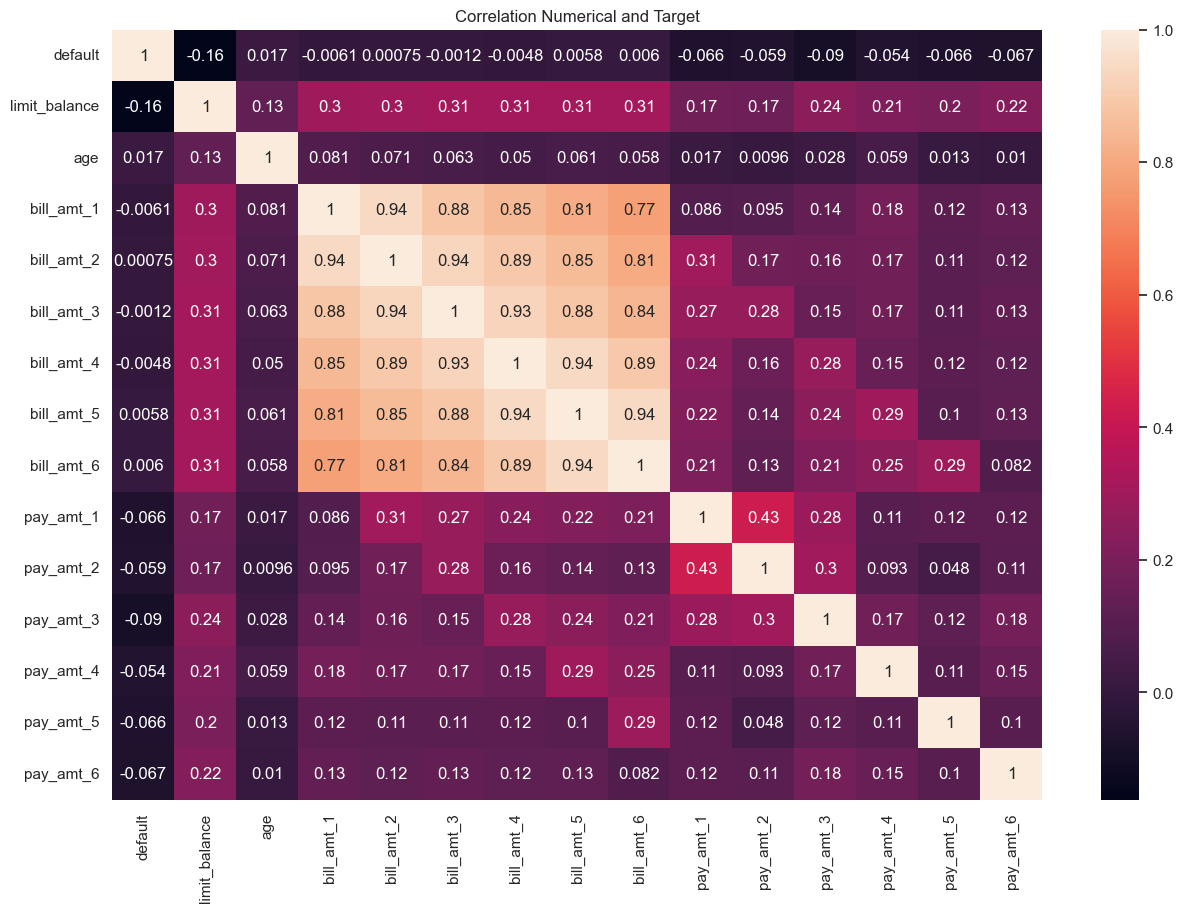

In [34]:
# Correlation between numerical and the target label
num_corr = df[['default']+num_cols]
plt.figure(figsize=(15,10))
sns.heatmap(num_corr.corr(),annot=True)
plt.title("Correlation Numerical and Target")
plt.show()

del num_corr

Here we can see that limit balance has a negative correlation with our target, and has the highest correlation compared to other feature. Therefore we will use this feature. 

We also decided to include age column, since the insight we get from eda process that age has an relationship with our target. That age does also plays an important role because in our opinion age does have an impact whether the credit card will be defaulted or not. And from our previous analysis, as the age progresses the less likely that the credit card will be defaulted. Age does also does have an important role at determining future prediction and is the standard of people who wants to apply for a credit card. Therefore we will also use this feature. 

Now we want to know correlation between ordinal data and target

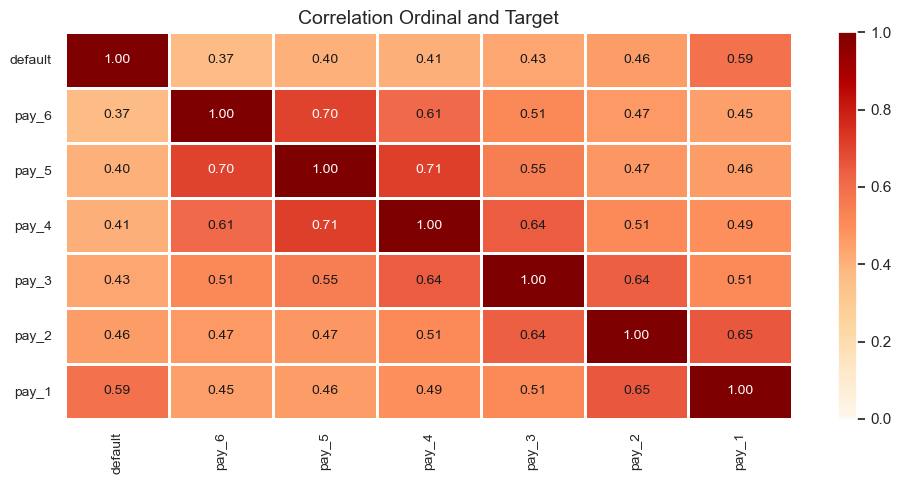

In [35]:
# Ordinal and target
df_ord = df[ord_cols+['default']]
corr_p = df_ord.phik_matrix(interval_cols='default')

plot_correlation_matrix(corr_p.values, 
                        x_labels=corr_p.columns, 
                        y_labels=corr_p.index, 
                        vmin=0, vmax=1, color_map="OrRd", 
                        title=r"Correlation Ordinal and Target", 
                        figsize=(10,5))
plt.show()

del df_ord, corr_p

Here we see all the ordinal data have high correaltion with our target. So we will use them all

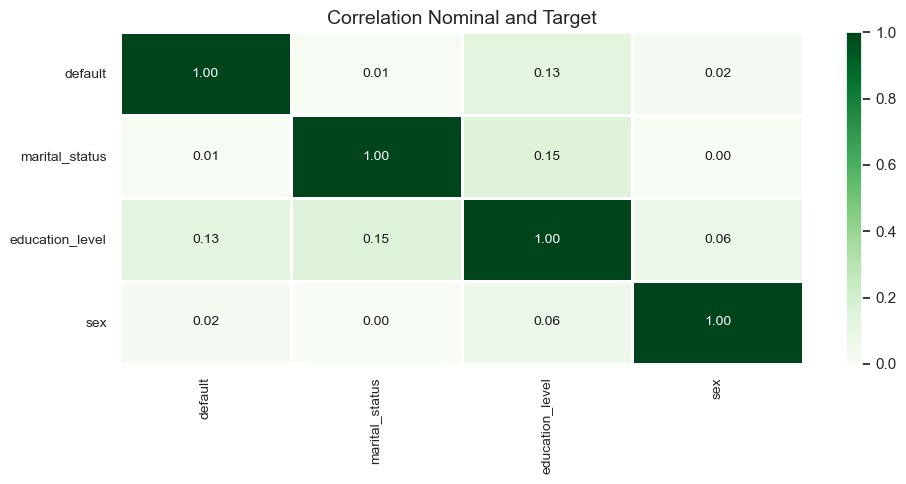

In [36]:
df_nom = df[nom_cols+['default']]
corr_p2 = df_nom.phik_matrix(interval_cols='default')

plot_correlation_matrix(corr_p2.values, 
                        x_labels=corr_p2.columns, 
                        y_labels=corr_p2.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Correlation Nominal and Target", 
                        figsize=(10,5))
plt.show()

del df_nom, corr_p2

Here we will only choose education_level from nominal data. Since it has the highest correlation with our target. And also from my assumption education_level may have an impact in a banks perspective of determining if someone is eligible to apply for a credit card and the chances of the said borrower candidate whether they'll default or not.

## Data Preprocessing

### Feature Selection

In [37]:
df_filtered = df[['limit_balance','age', 'education_level', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default']]
df_filtered.reset_index()
df_filtered.head()

,limit_balance,age,education_level,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default
0,130000,45,1,0,0,0,0,0,0,0
1,230000,41,2,0,0,0,0,0,0,1
2,200000,58,1,0,0,0,0,0,0,0
3,500000,39,1,0,0,0,0,0,0,0
4,230000,48,1,0,0,0,0,0,0,0


### Checking VIF

Now we want to calculate the VIF(Variance Inflation Factor), which is a measure if a column may contains the same information with another column.

We can say VIF as the degree of correlation between features. High correlation between features can cause problems in some classification algorithms, such as decision trees, because it can lead to overfitting.

In [38]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [39]:
calc_vif(df_filtered[['limit_balance','age']])

,variables,VIF
0,limit_balance,2.645745
1,age,2.645745


Here we only check our numerical feature. Both show low VIF score so we will go ahead.

### Data Split
 
We want to split our data, so seperate data for training and testing.

In [40]:
feature = ['limit_balance','age', 'education_level', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
target = ['default']

In [41]:
# Feature and target split
X = df_filtered[feature]
y = df_filtered[target]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=104)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)


Train Size :  (2371, 9)
Test Size  :  (593, 9)


Now we split into 4 data, also we use stratify to make sure the split between train set and test set each have equal propotion as the original y.

In [43]:
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
ord_cols = X_train.select_dtypes(include=['category']).columns.tolist()

print(f'Number of numerical columns: {len(num_cols)}')
print(f'Numerical columns: {num_cols}')
print(f'Number of categorical columns: {len(cat_cols)}')
print(f'Categorical columns: {cat_cols}')
print(f'Number of Ordinal columns: {len(ord_cols)}')
print(f'Ordinal columns: {ord_cols}')

X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols].reset_index(drop=True)
X_train_ord = X_train[ord_cols].reset_index(drop=True)

X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols].reset_index(drop=True)
X_test_ord = X_test[ord_cols].reset_index(drop=True)

Number of numerical columns: 2
Numerical columns: ['limit_balance', 'age']
Number of categorical columns: 1
Categorical columns: ['education_level']
Number of Ordinal columns: 6
Ordinal columns: ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


### Feature Enginering

Here we only do feature scaling to our numerical features, and since we didn't handle outlier and distribution data we will use RobustScaler.

This scaler is used when the data contains outliers, it can be a good option to use if the data is not normally distributed.

In [44]:
# Feature Scaling using MinMaxScaler
scaler = RobustScaler()

X_train_num = scaler.fit_transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

In [45]:
X_train_num_df = pd.DataFrame(X_train_num, columns=num_cols)
X_test_num_df = pd.DataFrame(X_test_num, columns=num_cols)

Now we have scaled our data.

### Concat Feature Numberic and Categorial Columns
Now we want to merge the feature we have been scaled

In [46]:
X_train_final = pd.concat([X_train_num_df, X_train_cat, X_train_ord], axis=1)
X_test_final = pd.concat([X_test_num_df, X_test_cat, X_test_ord], axis=1)

X_train_final.head()

,limit_balance,age,education_level,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,-0.500000,0.230769,2,0,0,0,0,0,0
1,-0.111111,-0.153846,2,2,2,2,2,2,2
2,-0.611111,-0.615385,2,0,0,0,0,0,0
3,-0.333333,0.000000,1,0,0,2,0,0,0
4,-0.500000,1.000000,3,1,2,0,0,0,0


Now we have a full data frame after feature enginering.

## Model Definition

In our code below is we define the models that we use.

In [47]:
#Defining Logistic regression and assigning to a variable
logreg = LogisticRegression()
#Defining SVM and assigning to a variable
svc = SVC()
#Defining Decision Tree and assigning to a variable
dt = DecisionTreeClassifier()
#Defining Random Forest and assigning to a variable
rf = RandomForestClassifier()
#Defining KNN and assigning to a variable
knn = KNeighborsClassifier()
#Defining Gaussian Naive Bayes and assigning to a variable
nb = GaussianNB()
#Defining Ada Boosting Classifier and assigning to a variable
ab = AdaBoostClassifier()

The models we're going to use for this project are:

* Logistic Regression
* Support Vector Machine (SVM)
* Decision Tree
* Random Forest
* K - Nearest Neighbor (KNN)
* Gaussian Naive Bayes (GaussianNB)
* Ada Boosting Classifier

Then we'll choose the best model based on the cross validation score and tune the hyperparameters with GridSearchCV.

## Cross Validation

We use cross-validation to evaluate our models which is a way to check how well our models generalize to a new unseen data.

We also use `StratifiedKFold ` because our data is imbalanced. Using this variation can ensure that the target variable distribution is approximately the same across all the folds of the cross-validation.

In [48]:
# Define Skfold using StratifiedKFold
skfold=StratifiedKFold(n_splits=5, random_state=7, shuffle=True)

# checking cross validation score
cv_log_model = cross_val_score(logreg, X_train_final, y_train, cv=skfold, scoring="recall")
cv_svm_model = cross_val_score(svc, X_train_final, y_train, cv=skfold, scoring="recall")
cv_dt_model = cross_val_score(dt, X_train_final, y_train, cv=skfold, scoring="recall")
cv_rf_model = cross_val_score(rf, X_train_final, y_train, cv=skfold, scoring="recall")
cv_knn_model = cross_val_score(knn, X_train_final, y_train, cv=skfold, scoring="recall")
cv_nb_model = cross_val_score(nb, X_train_final, y_train, cv=skfold, scoring="recall")
cv_ada_model = cross_val_score(ab, X_train_final, y_train, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_nb_model,cv_ada_model],['log_model','svm_model','dt_model','rf_model','knn_model','nb_model','ada_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

log_model
recall - All - Cross Validation  :  [0.38235294 0.40594059 0.36633663 0.31372549 0.38235294]
recall - Mean - Cross Validation :  0.37014172005435836
recall - Std - Cross Validation  :  0.03090972952479753
recall - Range of Test-Set       :  0.3392319905295608 - 0.4010514495791559
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0.45098039 0.38613861 0.37623762 0.41176471 0.42156863]
recall - Mean - Cross Validation :  0.40933799262279164
recall - Std - Cross Validation  :  0.026545856166680894
recall - Range of Test-Set       :  0.38279213645611077 - 0.4358838487894725
--------------------------------------------------
dt_model
recall - All - Cross Validation  :  [0.39215686 0.38613861 0.41584158 0.37254902 0.40196078]
recall - Mean - Cross Validation :  0.39372937293729376
recall - Std - Cross Validation  :  0.014597299730765064
recall - Range of Test-Set       :  0.3791320732065287 - 0.40832667266805883
----------------------

Here we know that the best model for our problem is GaussianNB, because it has the highest mean of recall score in our cross validation process. We use recall score because we want to know the total number of actual positive cases, which recall will measure the model's ability to correctly identify positive cases. Also it can be used better on unbalanced data, like we have now

Now we will try to improve our selected model, using hyperparameter tuning.

## Model Training

Now we will start our data training and also calculating the computational time of our data training 

In [49]:
start = time.time()
nb.fit(X_train_final, y_train)
end = time.time()

print(f'Training Duration : {end-start} sec')

Training Duration : 0.007978439331054688 sec


It takes 0.008 seconds to train our X and y data which is very fast. It is understandable because GaussianNB algorithm is a simple and fast algorithm.

## Model Evaluation
In this section we'll evaluate our trained model and finding out the scores from our model in predicting the default in credit card.

First we're going to predict our trained model to predict the train and tests data :

In [50]:
nb_pred_train = nb.predict(X_train_final)
nb_pred_test = nb.predict(X_test_final)

We use classification report in order to evaluate our model in predicting our train and test data. This is because it can provide several evaluation metrics that can help to understand the model's performance.


In [51]:
target_names = ['Not Default', 'Default']
print("=="*20,"TRAINING","=="*20)
print(classification_report(y_train,nb_pred_train,zero_division=0, target_names = target_names))
print("=="*20,"TEST","=="*20)
print(classification_report(y_test,nb_pred_test,zero_division=0, target_names = target_names))

======================================== TRAINING ========================================
              precision    recall  f1-score   support

 Not Default       0.87      0.88      0.88      1863
     Default       0.55      0.52      0.53       508

    accuracy                           0.80      2371
   macro avg       0.71      0.70      0.70      2371
weighted avg       0.80      0.80      0.80      2371

======================================== TEST ========================================
              precision    recall  f1-score   support

 Not Default       0.87      0.92      0.89       466
     Default       0.63      0.50      0.56       127

    accuracy                           0.83       593
   macro avg       0.75      0.71      0.73       593
weighted avg       0.82      0.83      0.82       593



Before we look for insights, we want to know what are the values in our classification report mean:

* Precision : Precision is a measure of how many of the positive predictions made are correct.

* Recall : Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data.

* F1 - Score : F1-Score is a measure combining both precision and recall. It's described as a harmonic mean of precision and recall.

* Support : Support is the number of actual occurrences of the class in the specified dataset. It's where we see if we have an imbalanced data so we know which metrics to see and evaluate.

* Accuracy: It's the number of correct predictions made by the classifier over the total number of predictions made.

So after finding our the definitions, we are going to focus on the default class because it's our main objective in predicting the defaulting in credit cards. If we put it in the concepts of True Positive, True Negative, False Positive, and False Negative, we could intepret as follows :

Positive Class : Default

Negative Class : Not Default

* True Positive : the classifier predicts default, in reality it is default

* True Negative : the classifier predicts not default, in reality it is no default

* False Positive : the classifier predicts default, in reality it is not defaulted

* False Negative : the classifier predicts not default, in reality it is defaulted

From the above concept, we want to focus on reducing on our False Negatives, since our False negative states the classifier predicts not default, in reality it is defaulted, so we're going to focus on the recall in our default class. We don't want our classifier to predict a people paid duly meanwhile in the reality they paid late (default).

So from our definition and explanations above, we could see that our data is best fitting based on results between the train and test data. But, if we look at the bigger picture, this model is underfitting because it is only predicted half target right and half is wrong.

We also want to highlight closer at the recall in the default class which is 0.50 on the test data. It simply implies that out of all the data of the people to be identified as default, the model only predicted 50% of the identified default correctly.

Now we want to see our predicted class.

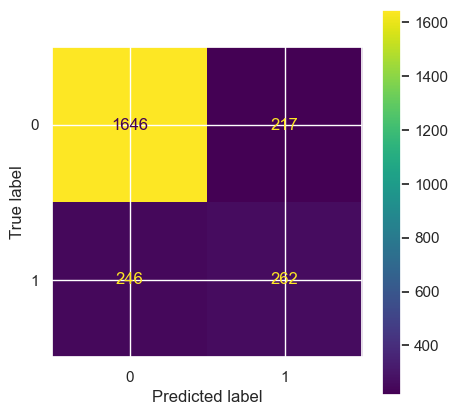

In [52]:
f,ax = plt.subplots(1,1,figsize=(5,5))
print(ConfusionMatrixDisplay.from_estimator(nb, X_train_final, y_train, ax=ax))


* From Confussion matrix from train predict, we see that with our model we predict 246 False Negative
* From Confussion matrix from train predict, we see that with our model we predict 262 True Positive

Here we can say that almost 50% percent of our data that should be predictied positive were mis-predicted as False negative

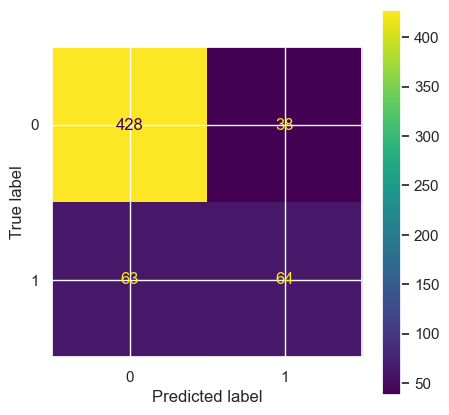

In [53]:
f,ax = plt.subplots(1,1,figsize=(5,5))
print(ConfusionMatrixDisplay.from_estimator(nb, X_test_final, y_test, ax=ax))

Now we want to know if tuning does make an impact in our recall results. So we'll do some Hyperparameter tuning with grid search in order to minimize False Negatives by increasing the recall value :

## Hyperparameter Tuning
In our code below, we put some combinations of hyperparameters and let the grid search find the best combinations for our model

In [54]:
hyperparameters = {
    'var_smoothing': np.logspace(0,-9, num=10)
}

nb_grid = GridSearchCV(nb, hyperparameters, cv = 10, scoring='recall', return_train_score=True)
nb_grid.fit(X_train_final, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])},
             return_train_score=True, scoring='recall')

From our grid search above, there are some important thing you'll need to know :

* We defined a 10 time cross validation fold which implies that we're splitting our data into 10 subsets which our algorithm will check those subsets with all the features applied.

* Because our objective in tuning is we want to minimize the False Negatives by boosting up our recall value, we defined our scoring in grid search as Recall.

* For hyperparameter, we only can use var_smoothing because tuning in GaussianNB is limited

After the grid search finished we can see the best combination of hyperparameters, it's time to see what the best parameters are :

In [55]:
nb_grid.best_params_

{'var_smoothing': 0.001}

And we want to see what the combinations best scores are :

In [56]:
nb_grid.best_score_

0.5194901960784314

Here we have the same score, with our model before tuning. But we will try to see this model in a whole.

We will see the best params in a DataFrame:

In [57]:
nb_df = pd.DataFrame(nb_grid.cv_results_)[['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
nb_df.sort_values(['mean_test_score', 'mean_train_score'], ascending=False) 


,params,mean_test_score,std_test_score,mean_train_score,std_train_score
4,{'var_smoothing': 0.0001},0.519490,0.077276,0.513783,0.010857
5,{'var_smoothing': 1e-05},0.519490,0.077276,0.513783,0.010857
6,{'var_smoothing': 1e-06},0.519490,0.077276,0.513783,0.010857
7,{'var_smoothing': 1e-07},0.519490,0.077276,0.513783,0.010857
8,{'var_smoothing': 1e-08},0.519490,0.077276,0.513783,0.010857
9,{'var_smoothing': 1e-09},0.519490,0.077276,0.513783,0.010857
3,{'var_smoothing': 0.001},0.519490,0.077276,0.512908,0.010939
2,{'var_smoothing': 0.01},0.515569,0.080583,0.507440,0.011036
1,{'var_smoothing': 0.1},0.460588,0.058537,0.461505,0.005243
0,{'var_smoothing': 1.0},0.374039,0.060293,0.374455,0.006015


Here we will see best hyperparameters and assign it on our new model

In [58]:
nb_grid.best_estimator_

GaussianNB(var_smoothing=0.001)

In [59]:
nb_tuned = nb_grid.best_estimator_

### Model Training & Evaluation After Tuning

Now we will use the tuned model and evaluate it, also compare the model before tuning and after tuning.

In [66]:
start = time.time()
nb_tuned.fit(X_train_final, y_train)
end = time.time()

print(f'Training Duration : {end-start} sec')

Training Duration : 0.00598907470703125 sec


After tuning, this model can run 0.006 which is faster than our base model.

Now we want to see if the tuned model can have a better score.

In [61]:
nb_tuned_pred_train = nb_tuned.predict(X_train_final)
nb_tuned_pred_test = nb_tuned.predict(X_test_final)

In [62]:
print('Before Tuning : ')
target_names = ['Not Default', 'Default']
print("=="*20,"TRAINING","=="*20)
print(classification_report(y_train,nb_pred_train,zero_division=0, target_names = target_names))
print("=="*20,"TEST","=="*20)
print(classification_report(y_test,nb_pred_test,zero_division=0, target_names = target_names))
print('After Tuning : ')
target_names = ['Not Default', 'Default']
print("=="*20,"TRAINING","=="*20)
print(classification_report(y_train,nb_tuned_pred_train,zero_division=0, target_names = target_names))
print("=="*20,"TEST","=="*20)
print(classification_report(y_test,nb_tuned_pred_test,zero_division=0, target_names = target_names))

Before Tuning : 
======================================== TRAINING ========================================
              precision    recall  f1-score   support

 Not Default       0.87      0.88      0.88      1863
     Default       0.55      0.52      0.53       508

    accuracy                           0.80      2371
   macro avg       0.71      0.70      0.70      2371
weighted avg       0.80      0.80      0.80      2371

======================================== TEST ========================================
              precision    recall  f1-score   support

 Not Default       0.87      0.92      0.89       466
     Default       0.63      0.50      0.56       127

    accuracy                           0.83       593
   macro avg       0.75      0.71      0.73       593
weighted avg       0.82      0.83      0.82       593

After Tuning : 
======================================== TRAINING ========================================
              precision    recall  f1-score 

Here we see no improvement at all, The tests shows that the classifier predicted the correct people that was defaulted is still 50% of all the default cases within the data.  

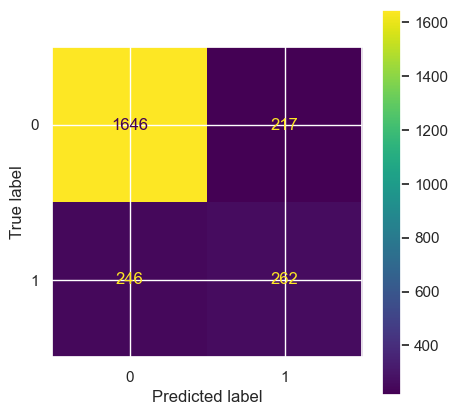

In [63]:
f,ax = plt.subplots(1,1,figsize=(5,5))
print(ConfusionMatrixDisplay.from_estimator(nb_tuned, X_train_final, y_train, ax=ax))


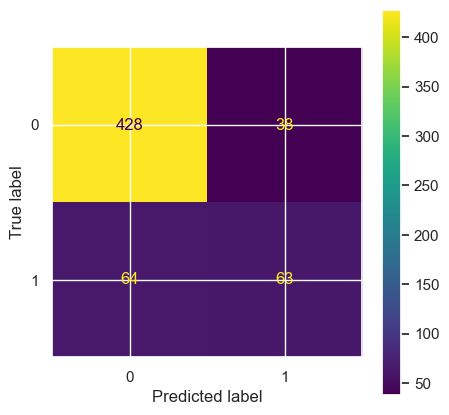

In [64]:
f,ax = plt.subplots(1,1,figsize=(5,5))
print(ConfusionMatrixDisplay.from_estimator(nb_tuned, X_test_final, y_test, ax=ax))

From this confussion matrix, the result is also the same.

## Conclusion & Overall Analysis

    From our project of predicting the chance of default payments, we can conclude some things :

1. We saw that majority of user genders are female in the ages of 21 - 69. With active majority peaking at the age of 42. So in conclusion saw a substantial difference in genders and ages, with the male peaking earlier in age which is 30 and dominated by female users.

2. In our Exploratory Data Analysis, we saw there is an imbalance proportions within our target label default. If we look at our data description, we have alot of non - default (0) data compared to objectives of this project which is the default (1) data. We also saw that the non - defaulted category (0) is dominated by the range age of 25 - 30. Meanwhile we saw a decrease in defaulted (1) as the age progresses. So in conclusion, the non - defaults has a higher margin than the defaulted.

3. We have done some manipulations within some of the candidate features earlier in our cleaning section, those features are : marital_status, education_level and pay_. We also renaming our pay_0 and our target label to ease us in calling that feature later. 

4. In our feature selection, we selected some features as explained below :

    * education_level does have an impact in a banks perspective of determining if someone is eligible to apply for a credit card and the chances of the said borrower candidate whether they'll default or not.

    * repayment status in pay_1 - pay_6 have an important role in determining if someone paid duly, or late.

    * We also select limit_balance, because we see a correlation with our target

    * age does also plays an important role because in our opinion age does have an impact whether the credit card will be defaulted or not. And from our previous analysis, as the age progresses the less likely that the credit card will be defaulted. Age does also does have an important role at determining future prediction and is the standard of people who wants to apply for a credit card.

5. We have 7 models as the candidate best model for our data. We cross validate each of the models in search of finding our most consistent model in terms of mean and standard deviation by recall score. We use recall score because we want to know the total number of actual positive cases, which recall will measure the model's ability to correctly identify positive cases. Also it can be used better on unbalanced data, like we have now. 

6. Results of our cross validation, shows that GaussianNB has the best score. Therefore, we will use this model and compare it with the tuned model.

7. We want to focus on reducing on our False Negatives, since our False negative states the classifier predicts not default, in reality it is defaulted, so we're going to focus on the recall in our default class. We don't want our classifier to predict a people paid duly meanwhile in the reality they paid late (default).

8. From our predictions with the GNB model with no hyperparameters, we also can say the model is best fitting, because the result only silghly different between train and test. Then we look at the recall in the default class which is 0.50 on the test data. It simply implies that out of all the data, people to be identified as default, with this model will only predict 50% of the identified default correctly. Then we try to tune our model in hopes of boosting the recall value

9. Then after we tuned the hyperparameters, the result do not improve at all. Recall score in the default class  is 0.50 on the test data. This is may happen because GaussianNB classifier has relatively few hyperparameters to tune. Therefore, the parameter space that GridSearchCV is searching over may be quite limited, making it less likely to find an optimal set of parameters. 

10. The training of our GaussianNB model with parameters is 0.002 second faster than our previous training with no hyperparameters.

11. Our model isn't good at all for predicting the default even after tuning. This may caused by the fact that  our data is imbalanced within the targets. We may need do imbalanced data handling to improve this situation.

## Model Saving

Now we want to save our model that we build and try to test it on a new data, to see its perfonmance.

In [65]:
with open('model_nb_tuned.pkl', 'wb') as file_1:
  joblib.dump(nb_tuned, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('list_num_cols.pkl', 'wb') as file_3:
  joblib.dump(num_cols, file_3)

with open('list_cat_cols.pkl', 'wb') as file_4:
  joblib.dump(cat_cols, file_4)

with open('list_ord_cols.pkl', 'wb') as file_5:
  joblib.dump(ord_cols, file_5)